In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
# import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,arange,linspace,meshgrid

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib inline

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

### Example

Find the flux of the vector field $z\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.

[3Demos demo](https://drew.youngren.nyc/3Demos/surfint/index.html?a=0&b=1&c=0&d=2*pi&x=u+cos%28v%29&y=u+sin%28v%29&z=u&P=0&Q=0&R=z&E=x%5E2+%2B+y%5E2&colorFunc=false&surfaceVisible=true&frameBallVisible=false&trailsVisible=true&S=graphs&nX=30&rNum=10&cNum=10&shards=0&nVec=5)

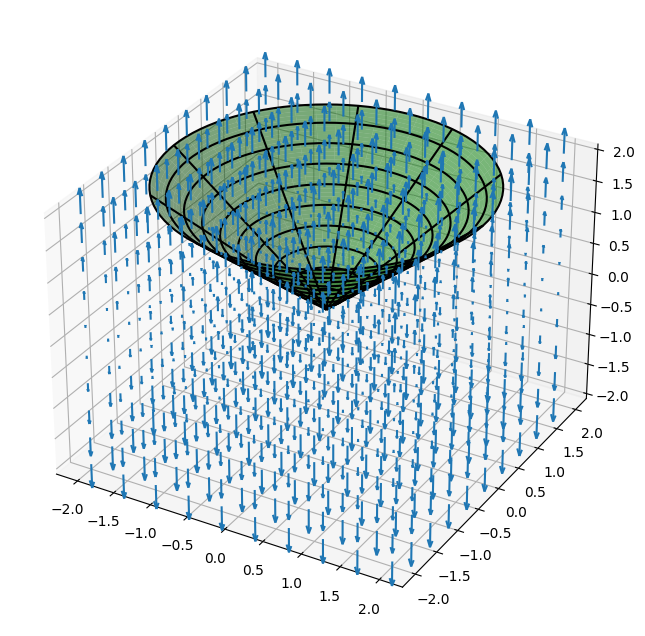

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
u = np.linspace(0,2,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5,color='g')
ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-2,2,10)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,0*U,0*U,W,length=.2);


<p style="padding-bottom:40%;"> </p>

# Lecture 22

## The Divergence Theorem

  - Objectives
    - Div and Curl
      - "del" operator $\nabla$
    - Divergence Theorem
      - know what divergence measures
      - describe it as a conservation law
      - use it to compute flux

  - Resources
    - Content
      - Stewart: §16.6-9
      - New Strang:  
        - [§6.5](https://openstax.org/books/calculus-volume-3/pages/6-5-divergence-and-curl) [§6.6](https://openstax.org/books/calculus-volume-3/pages/6-6-surface-integrals) [§6.8](https://openstax.org/books/calculus-volume-3/pages/6-8-the-divergence-theorem)
      - [3Demos](https://drew.youngren.nyc/3Demos/surfint/)
      - Mooculus: [Surface Integrals](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInSurfaceIntegrals) [Divergence Theorem](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInDivergenceTheorem)
    - Extras 
      - CalcBLUE: [2-Form Fields](https://www.youtube.com/watch?v=LNaAEy_K-Cg&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=64) *Use with caution. This is a different and more general formulation of surface integrals. 

<p style="padding-bottom:40%;"> </p>

## Divergence

Divergence is a scalar measurement on a vector field $ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z)  \,\vec k$. 

$$ \operatorname{div} \vec F = \nabla \cdot \vec F = P_x +Q_y + R_z $$

It measures the degree to which a vector field is "expanding" or "spreading out". 

<p style="padding-bottom:40%;"> </p>

# Another Big Theorem

Recall the special form of Green's Theorem in 2D.

$$ \oint_{\partial D} \vec F \cdot d \vec n = \iint_D (P_x + Q_y)\,dA$$ for a smooth vector field $\vec F = P \,\vec i + Q\,\vec j$. Note, the integrand on the right is (2D) divergence $\nabla \cdot \vec F $. 

<p style="padding-bottom:40%;"> </p>

## The Divergence Theorem

Let $E$ be a solid region in $\RR^3$ and $\partial E$ its outward-oriented boundary. If $\vec F(x,y,z)$ is a smooth vector field, then

$$ \iint_{\partial E} \vec F \cdot d \vec S = \iiint_E \nabla \cdot \vec F\,dV$$

In [4]:
@interact(zoom=(0,1,.025))
def _(zoom=1):

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    u = np.linspace(0,pi,150)
    v = np.linspace(0,2*pi,100)
    U,V = np.meshgrid(u,v)
    rd = 1+1/3*sin(U*2)**2*sin(V*3)**2
    srf = rd*sin(U)*cos(V),rd*sin(U)*sin(V),rd*cos(U)
    ax.plot_surface(*srf,alpha=.5*zoom,color='g')
    ax.plot_wireframe(*srf,alpha=zoom,color='k',rcount=10,ccount=10)
    u = v = np.linspace(-1,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,(V),W,U,V,W,length=.2,alpha=zoom);
    U,V = meshgrid([0,1],[0,1])
    srf = .05*U,0,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05,.05*U,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05*U,.05*V,.05 + U*0
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05*U,.05,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)

    U,V,W = np.meshgrid([0.,1.,2.],[0.,1.,2.],[0.,1.,2.])

    ax.quiver(.025*U,(.025*V),.025*W,.025*U,.025*V,.025*W,length=.2,alpha=(1 - zoom));

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-zoom,.1+.9*zoom])
    flush_figures();


interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, step=0.025), Output()), _dom_classes…

<p style="padding-bottom:40%;"> </p>

#### How to remember DT

  - Maxwell's equation
     $$\nabla\cdot \vec E = \rho$$
Charge density is the divergence of the electric field. 


![Screengrab for Electric Field Hockey](../img/efh.png)

Courtesy: [Electric Field Hockey](https://phet.colorado.edu/en/simulation/electric-hockey)

<p style="padding-bottom:40%;"> </p>

  - Champagne
![Mets' Terry CVollins spraying champagne in 2015](https://1.bp.blogspot.com/-UEzDm6Zzhco/ViioEBfuJVI/AAAAAAAAfak/Wv_PQY8hs-w/s1600/-fa3579127e7e3ceb.JPG)

Terry Collins knows the Divergence Theorem. Photo credit: [John Munson | NJ Advance Media for NJ.com](https://www.nj.com/mets/2015/10/look_inside_mets_clubhouse_as_they_celebrate_world.html)

<p style="padding-bottom:40%;"> </p>

## Justification

Start by considering the flux through the boundary of a solid region. Then consider chopping the region into tiny rectangular boxes and consider that the net flux is the sum of the flux out each little box as shared sides between adjacent boxes get cancelled out.
  
  

In [5]:
@interact(zoom=(0,1,.025))
def _(zoom=1):

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    u = np.linspace(0,pi,150)
    v = np.linspace(0,2*pi,100)
    U,V = np.meshgrid(u,v)
    rd = 1+1/3*sin(U*2)**2*sin(V*3)**2
    srf = rd*sin(U)*cos(V),rd*sin(U)*sin(V),rd*cos(U)
    ax.plot_surface(*srf,alpha=.5*zoom,color='g')
    ax.plot_wireframe(*srf,alpha=zoom,color='k',rcount=10,ccount=10)
    u = v = np.linspace(-1,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,(V),W,U,V,W,length=.2,alpha=zoom);
    U,V = meshgrid([0,1],[0,1])
    srf = .05*U,0,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05,.05*U,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05*U,.05*V,.05 + U*0
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05*U,.05,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)

    U,V,W = np.meshgrid([0.,1.,2.],[0.,1.,2.],[0.,1.,2.])

    ax.quiver(.025*U,(.025*V),.025*W,.025*U,.025*V,.025*W,length=.2,alpha=(1 - zoom));

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-zoom,.1+.9*zoom])
    flush_figures();

interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, step=0.025), Output()), _dom_classes…

#### Solution

$$\iint_{\partial E} \vec F\cdot \vec N\,dS \approx \sum\Delta \text{flux} $$

$$ \Delta\text{flux}_{x\text{-dir}} = \left(P\left(x + \frac{\Delta x}{2}, y, z\right) - P\left(x - \frac{\Delta x}{2}, y, z\right)\right) \Delta y\,\Delta z$$

$$\approx P_x(x,y,z)\, \Delta x\,\Delta y\,\Delta z$$

Similarly, 

$$ \Delta\text{flux}_{y\text{-dir}} \approx Q_y(x,y,z)\, \Delta x\,\Delta y\,\Delta z$$

$$ \Delta\text{flux}_{z\text{-dir}} \approx R_z(x,y,z)\, \Delta x\,\Delta y\,\Delta z$$

Add these together, to get

$$\sum\Delta \text{flux} = \sum (P_x + Q_y + R_z) \, \Delta x\,\Delta y\,\Delta z$$

$$ \longrightarrow \iiint_E \operatorname{div} \vec F dV $$

#### 

<p style="padding-bottom:40%;"> </p>

## Examples

Compute the flux of the radial vector field $x\,\vec i + y\,\vec j + z\,\vec k$ through the outward-oriented unit sphere. 
  
[3Demos demo](https://drew.youngren.nyc/3Demos/surfint/index.html?a=0.0001&b=pi&c=0&d=2+pi&x=sin%28u%29+cos%28v%29&y=sin%28u%29+sin%28v%29&z=cos%28u%29&P=x&Q=y&R=z&E=z%5E2+-+%28x%5E2+%2B+y%5E2%29%2F.999&colorFunc=false&surfaceVisible=true&frameBallVisible=false&trailsVisible=true&S=spheres&nX=80&rNum=10&cNum=10&shards=0&nVec=5)

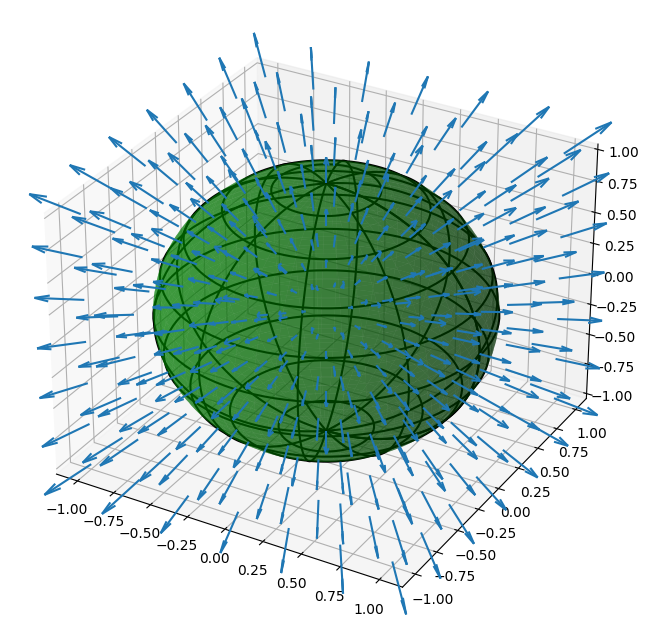

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
u = np.linspace(0,pi,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=.5,color='g')
ax.plot_wireframe(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-1,1,7)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,U,V,W,length=.2);


<p style="padding-bottom:40%;"> </p>

### Revisit Cone

Find the flux of the vector field $z\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.
  
  

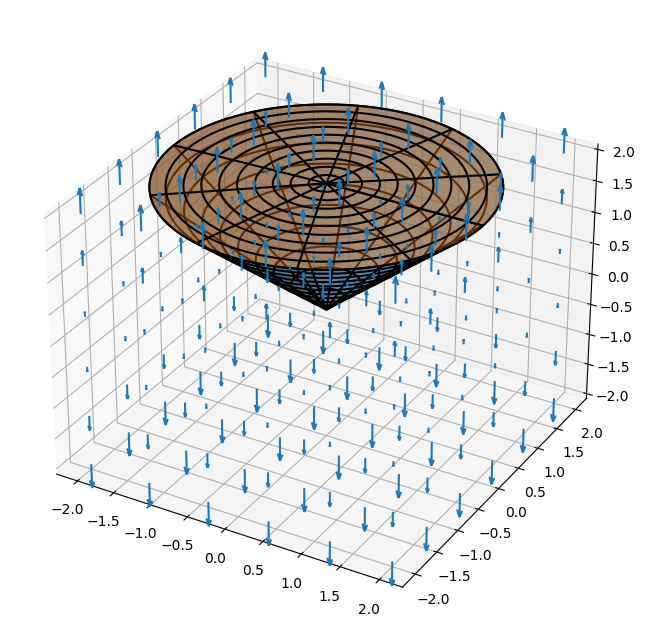

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
u = np.linspace(0,2,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
ax.plot_surface(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-2,2,6)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,0*U,0*U,W,length=.2);


<p style="padding-bottom:40%;"> </p>

### Fishing in a river

We revisit an example from [lecture on flux integrals](L22-Exercises-Solutions.ipynb).

Consider the constant vector field $\vec F(x,y,z) = \vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $x=0$ for $(0 \leq y,z \leq 1$
  - $\Omega_2$: piece of the surface $x= 3y(1-y)$ for $0 \leq y,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [8]:
@interact
def _(angle = (-96,6,6),caps=False):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(0*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(0*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.plot_surface(3*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(3*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    if caps:
        ax.plot_surface(3*V*U*(1-U),U,np.ones_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.ones_like(V),alpha=1,color='k',rcount=10,ccount=10)
        ax.plot_surface(3*V*U*(1-U),U,np.zeros_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.zeros_like(V),alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);
    flush_figures();

interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), Checkbox(value=False,…

Let $\Omega_1$ and $\Omega_2$ be as before (with a negative sign indicating an opposite orientation) and $T_1$ and $T_0$ be the enclosing, upward-oriented "caps" to the solid at $z=1$ and $z=0$, respectively. 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S + \iint_{-\Omega_1} \vec F\cdot d\vec S + \iint_{T_1} \vec F\cdot d\vec S + \iint_{-T_0} \vec F\cdot d\vec S = \iiint_E \nabla\cdot \vec F\,dV $$ 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S - \iint_{\Omega_1} \vec F\cdot d\vec S = 0 $$ 

### Exercise

In the example immediately above, change the vector field to $x\,\vec i$ and use the Divergence Theorem to compute the flux through $\Omega_2$. 

<p style="padding-bottom:40%;"> </p>

## Example - Gauss's Law

The Divergence Theorem is also known as Gauss's Theorem. A clever consequence of it in electrostatics is Gauss's Law.

$$\iint_{\Sigma} \vec E\cdot d\vec S = \frac{Q}{\varepsilon_0}  $$ where $\vec E$ is the electric field, $\varepsilon$ is the permittivity, $\Sigma$ is a closed surface, and $Q$ is the total charge contained therein.

In other words, the flux through a surface is independent of shape, but only depends on the amount of surrounded charge. 



In [9]:
@interact(t=(0,1,.04))
def _(t=0,angle=(-30,120,6)):
    fig = plt.figure(figsize=(11,11))
    ax = fig.add_subplot(projection='3d')
    u = np.linspace(0,1,55)
    v = np.linspace(0,1,55)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,.8,.5,.4))
    ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=6,ccount=6)
    ax.plot_surface(p,q,-r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,q,-r,alpha=1,color='k',rcount=6,ccount=6)
    rd = sqrt(U - U**2)
    p,q,r = U + 1/2, rd*cos(V*pi),rd*sin(V*pi)
    ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=4,ccount=4)
    ax.plot_surface(p,q,-r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,q,-r,alpha=1,color='k',rcount=4,ccount=4)

    ax.view_init(30,angle)
#     u = v = np.linspace(0,1,7)
#     # v = np.linspace(0,2*pi,10)
#     U,V,W = np.meshgrid(u,v,u)
#     ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);
    for c in 'xz':
        getattr(ax,f"set_{c}lim")((0,4))
    ax.set_ylim((-2,2))
    flush_figures();

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.04), IntSlider(value=42, descrip…